# 定义模型

In [83]:
import tensorflow as tf
class Model(object):
    def __init__(self):
        # 初始化变量
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x * x + self.b
 
# 测试
model = Model()

print(model(2))

tf.Tensor(20.0, shape=(), dtype=float32)


# 定义损失函数

In [5]:
def loss(predicted_y, true_y):
    return tf.reduce_mean(tf.square(predicted_y - true_y))

# 生成训练集

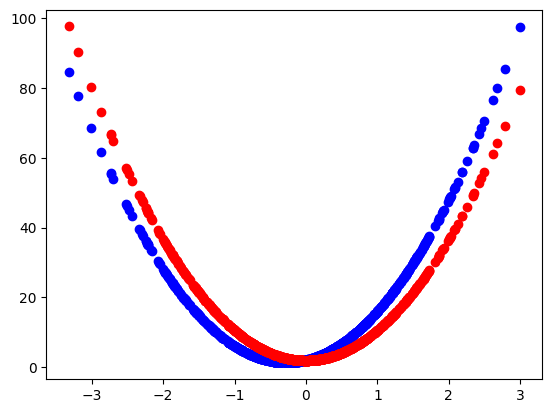

Init Loss:
tf.Tensor(25.6886, shape=(), dtype=float32)


In [49]:
TRUE_W = 9.0
TRUE_b = 2.0
num = 1000

# 随机输入
inputs = tf.random.normal(shape=[num])
# 随机噪音
noise = tf.random.normal(shape=[num], mean=0, stddev=5.0)

# 构造数据
outputs = TRUE_W * inputs * inputs + TRUE_b + noise

import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

# 当前loss
print('Init Loss:')
print(loss(model(inputs), outputs))

# 定义训练函数

In [72]:
import numpy as np
def train(model, inputs, outputs, learning_rate, batch_size=16):
    input_len = len(inputs)
    idx_list = np.arange(input_len)
    np.random.shuffle(idx_list)
    start = 0
    while start < input_len:
        end = min(start + batch_size, input_len)
        sub_epoch_idx = idx_list[start: end]
        start = end
        sub_inputs = tf.gather(inputs, sub_epoch_idx)
        sub_outputs = tf.gather(outputs, sub_epoch_idx)
        # 记录loss计算过程
        with tf.GradientTape() as t:
            sub_loss = loss(model(sub_inputs), sub_outputs)
            # 对W，b求导
            dW, db = t.gradient(sub_loss, [model.W, model.b])
            # 减去梯度×学习率
            model.W.assign_sub(dW*learning_rate)
            model.b.assign_sub(db*learning_rate)        

# 训练模型


epoch_count = 128
# 收集W，b画图
Ws, bs = [], []
for epoch in range(epoch_count):
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    # 计算loss
    current_loss = loss(model(inputs), outputs)
    train(model, inputs, outputs, learning_rate=0.01, batch_size=1024)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))
# 画图
# Let's plot it all
epochs = range(epoch_count)
plt.figure()
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.figure()
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()
